<a href="https://colab.research.google.com/github/Thanvitha/gis/blob/main/ps2_Thanvitha_Reddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:

The primary aim of this analysis is to assess the repercussions of the COVID-19 pandemic on India's job market. The dataset under consideration contains crucial information about the unemployment rates across various Indian states. The dataset encompasses key indicators such as States, Date, Measuring Frequency, Estimated Unemployment Rate (%), Estimated Employed Individuals, and Estimated Labour Participation Rate (%).

Dataset Details:

The dataset provides insights into the unemployment scenario across different Indian states:
*   States: The states within India.
*   Date: The date when the unemployment rate was recorded.
*   Measuring Frequency: The frequency at which measurements were taken (Monthly).
*   Estimated Unemployment Rate (%): The percentage of individuals unemployed in each state of India.
*   Estimated Employed Individuals: The count of people currently employed.
*   Estimated Labour Participation Rate (%): The proportion of the working population (age group: 16-64 years) participating in the labor force, either employed or actively seeking employment.



In [1]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
import seaborn as sns
import calendar
import plotly.graph_objects as go

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
!pip install mapclassify
import mapclassify #need for thematic map classification

In [3]:
! wget -q -O indian_map.zip https://docs.google.com/uc?id=1Bd7AxTbQYiQIPZy4u92ML489KG2OgsZo&export=download

zip_ref = zipfile.ZipFile('indian_map.zip', 'r'); zip_ref.extractall('Indian States'); zip_ref.close() #just unzipping
ind_gdf=gpd.read_file('/content/Indian States/India States/Indian_states.shp')

<Axes: >

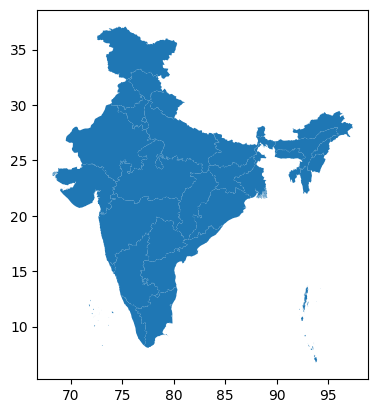

In [4]:
ind_gdf.plot()

In [33]:
ind_gdf['st_nm'] = ind_gdf['st_nm'].str.replace('&','').str.replace(" ",'').str.upper()
type(ind_gdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
ind_gdf.head(2)

In [44]:
ind_gdf.columns

Index(['st_nm', 'geometry'], dtype='object')

In [37]:
ind_rate = pd.read_excel('https://github.com/Thanvitha/gis/raw/main/unemployment_rate_new.xlsx')

In [38]:
ind_rate.head(30)

,st_nm,Unemployment Rate
0,Andhra Pradesh,7
1,Arunachal Pradesh,6
2,Assam,4
3,Bihar,19
4,Chhattisgarh,3
5,NCT of Delhi,21
6,Goa,10
7,Gujarat,2
8,Haryana,37
9,Himachal Pradesh,7


In [39]:
ind_rate.dtypes

st_nm                object
Unemployment Rate     int64
dtype: object

In [43]:
ind_rate.columns

Index(['st_nm', 'Unemployment Rate'], dtype='object')

In [46]:
ind_rate.rename(columns={"st_nm": "st_nm"}, inplace=True)

In [47]:
ind_rate['st_nm'] = ind_gdf['st_nm'].str.replace('&','').str.replace(" ",'').str.upper()

In [48]:
ind_map1 = pd.merge(ind_gdf, ind_rate, on='st_nm',how='outer',indicator=True)
ind_map1[['st_nm','_merge']]

ind_map2 = pd.merge(ind_gdf, ind_rate, on='st_nm',how='inner',indicator=False)

,st_nm,_merge
0,ANDAMANNICOBARISLAND,both
1,ARUNANCHALPRADESH,both
2,ASSAM,both
3,BIHAR,both
4,CHANDIGARH,both
5,CHHATTISGARH,both
6,DADARANAGARHAVELLI,both
7,DAMANDIU,both
8,GOA,both
9,GUJARAT,both


In [10]:
ind_unemploy = pd.read_excel('https://github.com/Thanvitha/gis/raw/main/Unemployment_Rate_upto_11_2020.xlsx')

In [11]:
ind_unemploy.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


In [12]:
ind_unemploy.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [13]:
ind_unemploy.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [14]:
import datetime as dt
# Renaming columns for better clarity
ind_unemploy.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

# Converting 'Date' column to datetime format
ind_unemploy['Date'] = pd.to_datetime(ind_unemploy['Date'], dayfirst=True)

# Converting 'Frequency' and 'Region' columns to categorical data type
ind_unemploy['Frequency'] = ind_unemploy['Frequency'].astype('category')
ind_unemploy['Region'] = ind_unemploy['Region'].astype('category')

# Extracting month from 'Date' and creating a 'Month' column
ind_unemploy['Month'] = ind_unemploy['Date'].dt.month

# Converting 'Month' to integer format
ind_unemploy['Month_int'] = ind_unemploy['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
ind_unemploy['Month_name'] = ind_unemploy['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column
ind_unemploy.drop(columns='Month', inplace=True)

In [15]:
ind_unemploy.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [16]:
unemploy_stat = ind_unemploy[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
print(round(unemploy_stat.describe().T, 2))

                                     count         mean          std  \
Estimated Unemployment Rate          267.0        12.24        10.80   
Estimated Employed                   267.0  13962105.72  13366318.36   
Estimated Labour Participation Rate  267.0        41.68         7.85   

                                           min         25%         50%  \
Estimated Unemployment Rate               0.50        4.84        9.65   
Estimated Employed                   117542.00  2838930.50  9732417.00   
Estimated Labour Participation Rate      16.77       37.26       40.39   

                                             75%          max  
Estimated Unemployment Rate                16.76        75.85  
Estimated Employed                   21878686.00  59433759.00  
Estimated Labour Participation Rate        44.06        69.69  


In [17]:
region_stats = ind_unemploy.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed',
                                       'Estimated Labour Participation Rate']].mean().reset_index()
print(round(region_stats, 2))

      Region  Estimated Unemployment Rate  Estimated Employed  \
0       East                        13.92         19602366.90   
1      North                        15.89         13072487.92   
2  Northeast                        10.95          3617105.53   
3      South                        10.45         14040589.33   
4       West                         8.24         18623512.72   

   Estimated Labour Participation Rate  
0                                40.11  
1                                38.70  
2                                52.06  
3                                40.44  
4                                41.26  


<Figure size 600x400 with 0 Axes>

<Axes: >

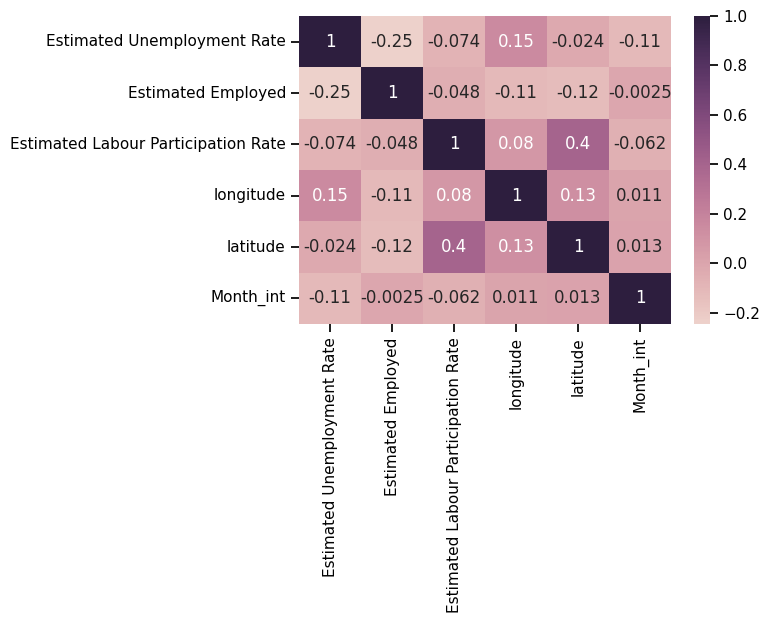

In [18]:
hm = ind_unemploy[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude', 'Month_int']]
hm = hm.corr()
plt.figure(figsize=(6,4))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=hm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

In [53]:
import plotly.express as px
fig = px.box(ind_unemploy, x='States', y='Estimated Unemployment Rate', color='States', title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})

In [20]:
fig = px.scatter_matrix(ind_unemploy,template='seaborn',dimensions=['Estimated Unemployment Rate', 'Estimated Employed',
                                                          'Estimated Labour Participation Rate'],color='Region')
fig.show()

In [21]:
plot_unemp = ind_unemploy[['Estimated Unemployment Rate','States']]
ind_unemploy_unemployed = plot_unemp.groupby('States').mean().reset_index()

ind_unemploy_unemployed = ind_unemploy_unemployed.sort_values('Estimated Unemployment Rate')

fig = px.bar(ind_unemploy_unemployed, x='States',y='Estimated Unemployment Rate',color = 'States',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()

In [22]:
ind_unemploy.Region.unique()

['South', 'Northeast', 'East', 'West', 'North']
Categories (5, object): ['East', 'North', 'Northeast', 'South', 'West']

In [23]:
Region = ind_unemploy.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean()
Region = pd.DataFrame(Region).reset_index()

In [50]:
# Average Unemployment Rate

fig = px.bar(Region,x='Region',y='Estimated Unemployment Rate',color='Region',title='Average unemployment rate(regionwise)')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
#fig.show()

In [51]:
fig = px.scatter_geo(ind_unemploy,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Month_name",scope='asia',template='seaborn',title='Impack of lockdown on Employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#3399FF",
    showocean=True)

In [26]:
# data representation before and after lockdown

before_lockdown = ind_unemploy[(ind_unemploy['Month_int']>=1) &(ind_unemploy['Month_int'] <4)]
after_lockdown = ind_unemploy[(ind_unemploy['Month_int'] >=4) & (ind_unemploy['Month_int'] <=6)]

In [27]:
af_lockdown = after_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

lockdown = before_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
lockdown['Unemployment Rate Before Lockdown'] = af_lockdown['Estimated Unemployment Rate']

lockdown.columns = ['States','Unemployment Rate Before Lockdown','Unemployment Rate After Lockdown']
lockdown.head()

,States,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,5.700000,13.750000
1,Assam,4.613333,7.070000
2,Bihar,12.110000,36.806667
3,Chhattisgarh,8.523333,9.380000
4,Delhi,18.036667,25.713333


In [52]:
# unenployment rate change after lockdown

lockdown['rate change in unemployment'] =round(lockdown['Unemployment Rate Before Lockdown']-lockdown['Unemployment Rate Before Lockdown']
                                              /lockdown['Unemployment Rate After Lockdown'],2)
fig = px.bar(lockdown,x='States',y='rate change in unemployment',color='rate change in unemployment',
            title='Percentage change in Unemployment rate in each state after lockdown',template='ggplot2')
fig.update_layout(xaxis={'categoryorder':'total ascending'})